# Intro to Data Analysis: Project

This class has been more about manipulating the data using the Python data science stack (Pandas, NumPy, and Matplotlib). Therefore, the inferences from the data will be about visualizing trends rather than using statistical tests.

## Chosen Data Set: Titanic Data

Since I chose the titanic data set, this section imports all the libraries to be used and the data set itself.

In [2]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
# load data set
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## Potential Questions

The first step in developing questions to consider is to what data is available in the dataset.

In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The seed question for the project was "What factors made people more likely to survive?", so this question will be the ultimate question. To figure out what factors are important, this analysis will examine the following:
- age ('Age')
- gender ('Sex')
- the passenger class ('Pclass')
- cost of ticket ('Fare')
- passenger berth ('Embarked')
- quantity of family members ('SibSp' & 'Parch')

## Analysis

### Overall Survival Rate

In [5]:
# start by looking at overall survival rate
titanic_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Looking at the survival rate, there should be some reasoning behind who survived and who didn't. Hopefully, the data contains correlations between its factors that can help explain who survived.

### Age & Sex (Simple Demographic Factors)

Start by looking at the passenger make up by age and sex.

In [6]:
# passenger breakdown by sex
titanic_df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

There were definitely more males than females onboard. 

Next we look at the age distribution of the passengers.

In [7]:
# general information about passenger age
titanic_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([  40.,   14.,   15.,   31.,  104.,   97.,   83.,   79.,   63.,
          59.,   31.,   34.,   22.,   14.,   15.,    6.,    5.,    1.,    1.]),
 array([  0.        ,   4.21052632,   8.42105263,  12.63157895,
         16.84210526,  21.05263158,  25.26315789,  29.47368421,
         33.68421053,  37.89473684,  42.10526316,  46.31578947,
         50.52631579,  54.73684211,  58.94736842,  63.15789474,
         67.36842105,  71.57894737,  75.78947368,  80.        ]),
 <a list of 19 Patch objects>)

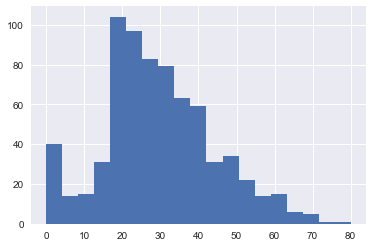

In [8]:
# histgram of passenger count by age
age_bins = np.linspace(0, 80, 20) # 20 bins between 0 and 80
plt.hist("Age", range=(0,80), bins=age_bins, data=titanic_df)

Now that we have a general picture of the age and sex of the passengers, we can look at the effects on survival.

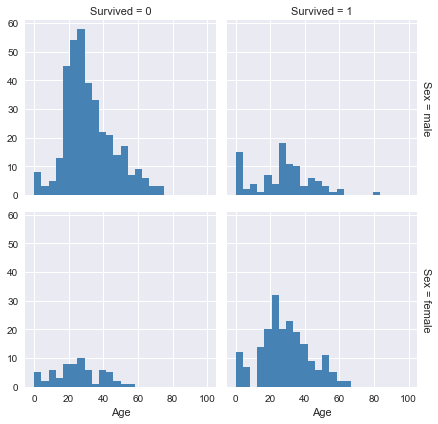

In [9]:
# graph sex and age simultaneously
survival_age_sex = sns.FacetGrid(data=titanic_df, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 100, 25)
survival_age_sex.map(plt.hist, "Age", color="steelblue", bins=bins, lw=0)

As can be seen from the graphs above, more females survived than males since the survival curves are much higher for females than males despite males greatly outnumbering the females in the population of passengers. The curves also look to have a bimodal distribution. In other words, up to a certain age, the children of both sexes were more likely to survive.

## Passenger Class

Since sex turned out to be a big factor correlating to survival, the examination of passenger class will be broken by gender.

[(0, 1)]

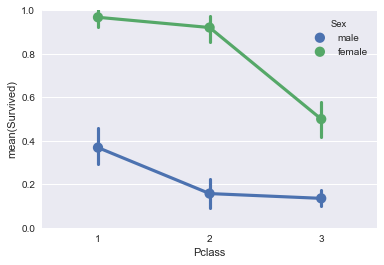

In [10]:
# graph mean survival based on passenger class
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df).set(ylim=(0, 1))

Once again, the mean survival of women is greater than men across all classes. Amongst each gender's respective groups, there also seems to be an increased survival of men in 1st class and women in 1st and 2nd class.

However, if you remember, the survival curve seemed to be bimodal where age was more relevent than sex below a certain cut-off. There doesn't seem to be a clear, hard cut-off, so a guestimate of age 16 as being a child will be used moving forward.

Since below the age cut-off, only age matters and above the cut-off, only sex matters, we can combine the age and sex to look at both at the same time. To do this, we can create a third virtual sex, called 'child'.

Creation of Combination Age/Sex Column:
* A new column called 'CSex' will be created to examine the effects of the sex/age combination. 
* The sex of a passenger will carry over, unless the passenger is less than or equal to 16, in which case the passenger will be marked as 'child'.

In [11]:
# create a new column that seperates out children and only keeps the sex of people > 16
titanic_df["CSex"] = titanic_df["Sex"].copy()
titanic_df["CSex"][titanic_df["Age"] <= 16] = 'child'

/Users/charlesdellinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


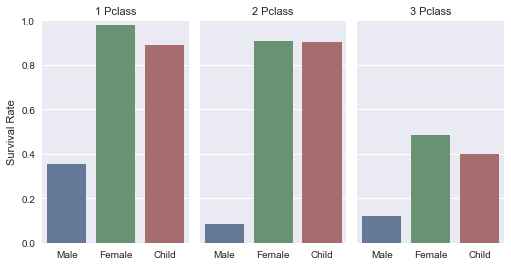

In [12]:
# bar graph of survival of men, women, and children of each passenger class
pclass_by_csex = sns.factorplot(x="CSex", y="Survived", col="Pclass",
                   data=titanic_df, saturation=.5,
                   kind="bar", ci=None, aspect=.6)
(pclass_by_csex.set_axis_labels("", "Survival Rate")
 .set_xticklabels(["Male", "Female", "Child"])
 .set_titles("{col_name} {col_var}")
 .set(ylim=(0, 1))
 .despine(left=True))  

[(0, 1)]

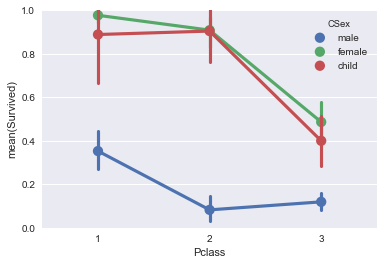

In [13]:
# plot of survival of men, women, and children of each passenger class
sns.pointplot(x="Pclass", y="Survived", hue="CSex", data=titanic_df).set(ylim=(0, 1))

The above figures show that when children were pulled out of the man/woman breakdown, women still had larger survival than men of all classes and children had similar survival trends as women. Women and children of 1st and 2nd class had higher survival than 3rd class. For men, the effect is still that men only had higher survival in 1st class.

## Ticket Fare

Just by logic, the fare probably correlates to passenger class, so the ticket price should show a similar correlation to survival as passender class.

In [14]:
# general statistics of ticket price
titanic_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

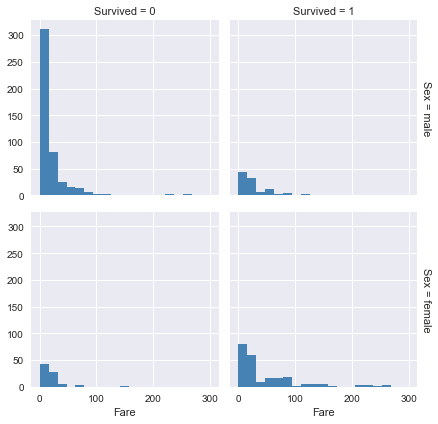

In [15]:
# histogram of survival quantity of male and female broken down by ticket cost
fare_plot = sns.FacetGrid(data=titanic_df, row="Sex", col="Survived", margin_titles=True)
fare_bins = np.linspace(titanic_df["Fare"].min(), 300, 20)
fare_plot.map(plt.hist, "Fare", color="steelblue", bins=fare_bins, lw=0)

The histogram doesn't really show too much of anything, except that there are clearly more lower fair passengers than higher fare passengers.

Since the fare prices are across a large range, putting the fares into smaller bins might help with the visualization. Here the ticket prices were placed into quartiles.

In [16]:
# put "Fare" column into 4 bins corresponding to quartiles
# output is a column containing 0-3
ticket_price_in_bins = pd.qcut(titanic_df["Fare"],4,labels=["1st Q", "2nd Q", "3rd Q", "4th Q"])

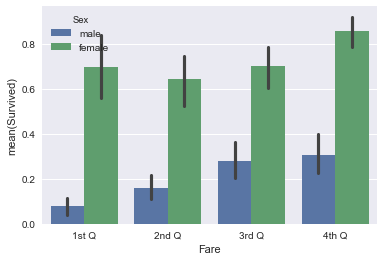

In [17]:
sns.barplot(x=ticket_price_in_bins, y="Survived", hue="Sex", data=titanic_df)

There seems to be a trend for increasing survival of men with increased fare price, but the trend for women seems less clear. Let's look at a finer breakdown.

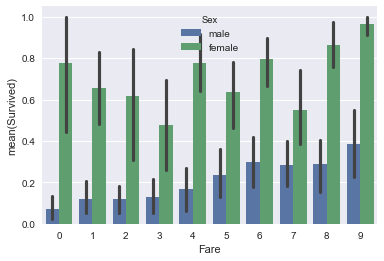

In [18]:
sns.barplot(x=pd.qcut(titanic_df["Fare"],10,labels=False), y="Survived", hue="Sex", data=titanic_df)

The finer breakdown of men and women by fare shows the same increasing survival for men. The breakdown for women is a little less clear except that it is much higher than men across all fares.

We can check and see if pulling out children makes any difference.

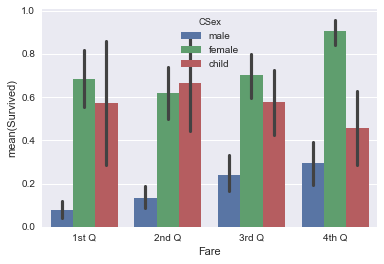

In [18]:
sns.barplot(x=ticket_price_in_bins, y="Survived", hue="CSex", data=titanic_df)

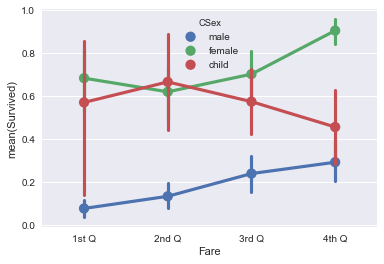

In [22]:
sns.pointplot(x=ticket_price_in_bins, y="Survived", hue="CSex", data=titanic_df)

After seperating out the children, the trend for female passengers is much more clear. For the most part, as fare price increased for men and women, their survival went up, but the survival of female passengers was much higher than men. The survival trends of children is less clear, which is probably due to smaller sample sizes in the upper quartiles skewing the survival (look at how large the error bars are).

## Embarked

The location of each passenger's berth really shouldn't make a difference unless it is indicative of some other information, like a concentrated boarding of higher fare passengers from a richer area. If this variable correlates, it will require more investigation into potential confounders.

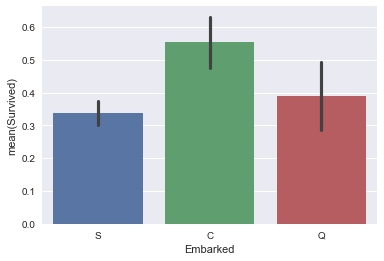

In [21]:
sns.barplot(x="Embarked", y="Survived", data=titanic_df)

There seems to be some slight differences, so let's first examine whether there is a high survival rate based on sex/age that is skewing the overall survival at the ports of berth.

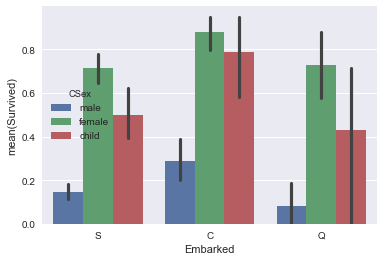

In [22]:
sns.barplot(x="Embarked", y="Survived", hue="CSex", data=titanic_df)

There seems to be an increase in survivability in passengers that embarked at port C across all age/sexes. After the breakdown, the survial between ports S and Q seem more similar.

Let's see if there's a difference in fare that can exmplain the difference in survival of port C.

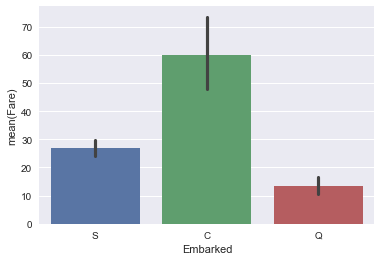

In [28]:
sns.barplot(y="Fare", x="Embarked", data=titanic_df)

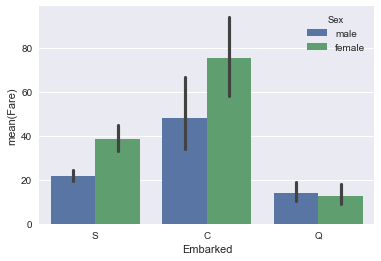

In [27]:
sns.barplot(y="Fare", x="Embarked", hue="Sex", data=titanic_df)

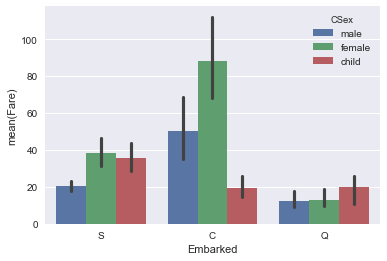

In [25]:
sns.barplot(y="Fare", x="Embarked", hue="CSex", data=titanic_df)

The fare's of passengers that embarked at port C seem higher overall. Strangely, the fares at port S seem higher than port Q, despite the overall survival being more similar.

## Family Size

Another potential survival factor could be the size of a family. Some potential thoughts about why there could be differences in survivability based on family size include:
* the family had to try and find the rest of its members
* the whole family was trying to all board the same lifeboat as a unit 

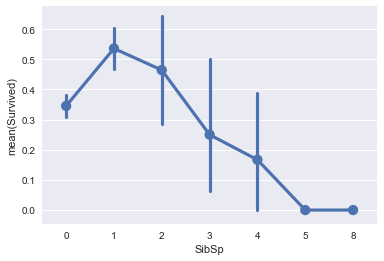

In [34]:
sns.pointplot(x='SibSp', y='Survived', data=titanic_df)

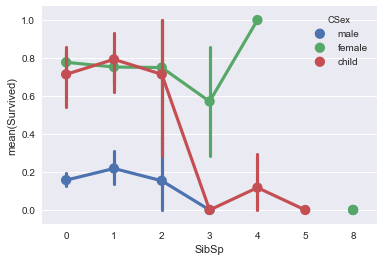

In [30]:
sns.pointplot(x='SibSp', y='Survived', hue='CSex', data=titanic_df)

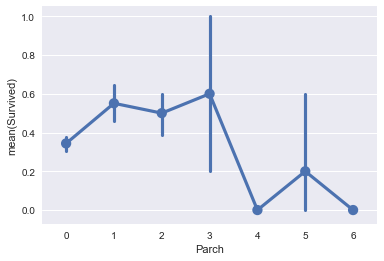

In [35]:
sns.pointplot(x='Parch', y='Survived', data=titanic_df)

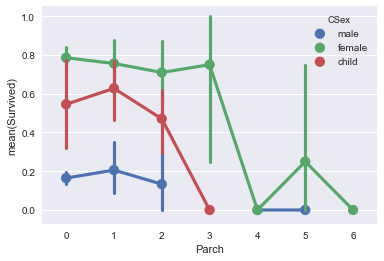

In [31]:
sns.pointplot(x='Parch', y='Survived', hue='CSex', data=titanic_df)

Looking at 'SibSp' and 'Parch' seems to indicate that there is a decrease in survivability as the family unit increases. The trends of 'SibSp' and 'Parch' broken down by age/sex seem to support that. An interesting trend in the 'Parch' data is that females that are mothers, have a very high, almost flat looking chance of survial.

Let's combine the siblings/spouse and parents/children section to create a new family size column called 'FamSize'.

Creation of Family Size:
* Create column 'FamSize' by adding column 'SibSp' and 'Parch' adding 1 to include passenger in family size value

In [36]:
titanic_df['FamSize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

We're now going to build a table that shows all three. We're going to seperate out the surival data of each and then combine them into one dataframe to get a nicer graph.
Steps:
* Get the mean survival based on siblings/spouse, parents/children, and total family size
    * Inspect and see if there is a zero survivability that is going to make the graph look wierd
* Create a new DataFrame of combined data
    * Add a column 'type' to indicate what kind of data so that we can use it as a 'hue'
    * Change the respective quanitity values ('SibSp','Parch', and 'FamSize') to a uniform column 'people' to graph on the same axis
    * Concatenate previous mean survival outputs

In [48]:
# get the mean survival based on siblings/spouse, parents/children, and total family size
siblings_spouse = titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)
parents_children = titanic_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)
family_size = titanic_df[['FamSize', 'Survived']].groupby(['FamSize'], as_index=False).mean().sort_values(by='FamSize', ascending=True)
# since the survival was saved as variable to graph, they need to be printed them
print siblings_spouse, '\n' * 2, parents_children, '\n' * 2, family_size

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 

   FamSize  Survived
0        1  0.303538
1        2  0.552795
2        3  0.578431
3        4  0.724138
4        5  0.200000
5        6  0.136364
6        7  0.333333
7        8  0.000000
8       11  0.000000


In [49]:
# Check quantities to make sure none of the percent survival values have a quantity of zero
for label in ['SibSp', 'Parch', 'FamSize']:
    print titanic_df[[label, 'Survived']]\
          .groupby([label], as_index=False)\
          .count().sort_values(by=label, ascending=True)

   SibSp  Survived
0      0       608
1      1       209
2      2        28
3      3        16
4      4        18
5      5         5
6      8         7
   Parch  Survived
0      0       678
1      1       118
2      2        80
3      3         5
4      4         4
5      5         5
6      6         1
   FamSize  Survived
0        1       537
1        2       161
2        3       102
3        4        29
4        5        15
5        6        22
6        7        12
7        8         6
8       11         7


In [50]:
# Add a column 'type' to indicate what kind of data so that we can use it as a 'hue'
# Change the respective quanitity values to a uniform column 'people' to graph on the same axis
siblings_spouse['type'] = 'SibSp'
siblings_spouse['people'] = siblings_spouse['SibSp']
parents_children['type'] = 'Parch'
parents_children['people'] = parents_children['Parch']
family_size['type'] = 'FamSize'
family_size['people'] = family_size['FamSize']
# Concatenate output survival DataFrames
family_survival_df = pd.concat([siblings_spouse, parents_children, family_size])

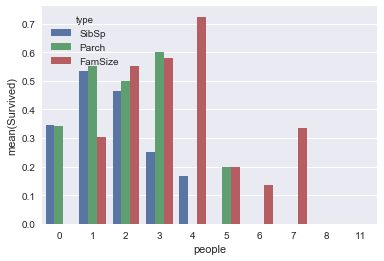

In [51]:
sns.barplot(x='people', y='Survived', hue='type', data = family_survival_df)

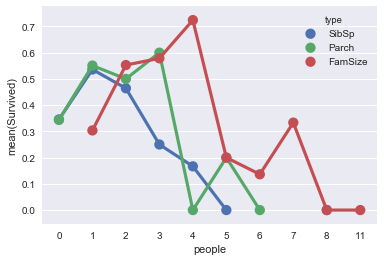

In [52]:
sns.pointplot(x='people', y='Survived', hue='type', data = family_survival_df)

## Conclusions

### Age/Sex
The combination of age and sex was a very important factor in survival; below the age considered a child, the low age increased survival, and above the age of child, being female increased survival over males.
### Pclass
The passenger class also made a difference with 1st and 2nd class having a much higher survival than 3rd class.
### Fare
The fare price made a difference in survival with increased survival of men and women with increasing fare. For some reason, separating out children didn't show the same trend for children.
### Embarked
The port of call seemed to have an influence, but on closer inspection it was due to differences in passenger make up at port C. The other port, S and Q, didn't show the same trend despite differences in fare prices bewteen the ports.
### Family Size
The family size showed a decrease in survivability with increasing size when examining 'SibSp', 'Parch', and 'FamSize' (the total family size). The exception was women that were parents who had an increased survival despite the family size (we separated out children so it is assumed that the females in the 'Parch' were parents).